<a href="https://colab.research.google.com/github/Matheushp5/Exploratory-Data-nalysis/blob/main/telescope_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1> Machine Learning Project - Study </h1>

The objective of this notebook is purely academic.

The opensource data set available can be found at the below URL.

In [ ]:
# import libraries

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import requests
import zipfile
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# downloading the file

URL = 'https://archive.ics.uci.edu/static/public/159/magic+gamma+telescope.zip'

file_download = requests.get(URL)

file_name = 'magic.zip'
with open(file_name, 'wb') as file:
    file.write(file_download.content)

In [ ]:
#extracting the file

extract = 'extracted_contents'

with zipfile.ZipFile('magic.zip', 'r') as zip_ref:
    zip_ref.extractall(extract) # after extracting, move the file 'magic04.data' to the same directory of this notebook

<p>Disclaimer</p>
<p>The data set was generated by a Monte Carlo program, Corsika, described in:
    D. Heck et al., CORSIKA, A Monte Carlo code to simulate extensive air showers,
    Forschungszentrum Karlsruhe FZKA 6019 (1998).</p>
<p><a src='http://rexa.info/paper?id=ac6e674e9af20979b23d3ed4521f1570765e8d68'>Click here</a></p>

The program was run with parameters allowing to observe events with energies down to below 50 GeV.

<h2> EDA </h2>

In this particular scenario, we'll just explore the data without doing and transformation to it. This is for academic porpuse only.

In [ ]:
df = pd.read_csv('magic04.data')
df.head()

28.7967   16.0021  2.6449  0.3918  0.1982   27.7004   22.011  -8.2027  \
0   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238  -9.9574   
1  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580 -45.2160   
2   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633  -7.1513   
3   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525  21.8393   
4   51.6240   21.1502  2.9085  0.2420  0.1340   50.8761  43.1887   9.8145   

    40.092  81.8828  g  
0   6.3609  205.261  g  
1  76.9600  256.788  g  
2  10.4490  116.737  g  
3   4.6480  356.462  g  
4   3.6130  238.098  g

As we can see, the labels are numerical, but, before we address that, let's check somw information about it.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19019 entries, 0 to 19018
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   28.7967  19019 non-null  float64
 1   16.0021  19019 non-null  float64
 2   2.6449   19019 non-null  float64
 3   0.3918   19019 non-null  float64
 4   0.1982   19019 non-null  float64
 5   27.7004  19019 non-null  float64
 6   22.011   19019 non-null  float64
 7   -8.2027  19019 non-null  float64
 8   40.092   19019 non-null  float64
 9   81.8828  19019 non-null  float64
 10  g        19019 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.6+ MB


Now let's change the labels to the correct values

In [ ]:
# creating a list with the labels
cols = ["fLength","fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", " fAlpha", "fDist", "class"]

# now, sending them to the df
df.columns = cols
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
1  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
2   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
3   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   
4   51.6240   21.1502  2.9085  0.2420  0.1340   50.8761  43.1887    9.8145   

    fAlpha    fDist class  
0   6.3609  205.261     g  
1  76.9600  256.788     g  
2  10.4490  116.737     g  
3   4.6480  356.462     g  
4   3.6130  238.098     g

If we look into the 'class' column, we'll see that it has letters (object) stored.

To see the values, we can use the .unique() function.

In [ ]:
df['class'].unique()

array(['g', 'h'], dtype=object)

Let's change them into numbers by doing some feature emcoding with the nominal values.

Here, I'll simply use .get_dummies to transform the values into 0 and 1 by doing some hot-enconding.

In [ ]:
df1 = df.copy() # make a copy to save our work

df_encoded = pd.get_dummies(df, columns=["class"])
df_encoded.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
1  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
2   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
3   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   
4   51.6240   21.1502  2.9085  0.2420  0.1340   50.8761  43.1887    9.8145   

    fAlpha    fDist  class_g  class_h  
0   6.3609  205.261        1        0  
1  76.9600  256.788        1        0  
2  10.4490  116.737        1        0  
3   4.6480  356.462        1        0  
4   3.6130  238.098        1        0

However, for this data analysis (EDA) and modeling, we'll have another approach, which is simply substitution the leters by the numbers 0 and 1.

It is just a second approach with the same result.

In [ ]:
df1["class"] = (df["class"] == "g").astype(int) # it converts the assigned columnto int

If we look the original df now, we'll see that 'g' (gamas) have been converted to 0 (as it is true in the code above) and the rest (in this case, 'h') will be 1.

In [ ]:
df1.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
1  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
2   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
3   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   
4   51.6240   21.1502  2.9085  0.2420  0.1340   50.8761  43.1887    9.8145   

    fAlpha    fDist  class  
0   6.3609  205.261      1  
1  76.9600  256.788      1  
2  10.4490  116.737      1  
3   4.6480  356.462      1  
4   3.6130  238.098      1

One of the most inportant thinsg when working with data is to have no skwed data (Normal Distribuition). First, we can check the .describe() function.

This will help us identify big gaps.

In [ ]:
df_encoded = df1.copy()

describe_df = df_encoded.describe()
describe_df

fLength        fWidth         fSize         fConc        fConc1  \
count  19019.000000  19019.000000  19019.000000  19019.000000  19019.000000   
mean      53.251440     22.181291      2.825026      0.380326      0.214658   
std       42.365598     18.346484      0.472609      0.182818      0.110514   
min        4.283500      0.000000      1.941300      0.013100      0.000300   
25%       24.336000     11.863700      2.477100      0.235800      0.128450   
50%       37.149000     17.140600      2.739600      0.354100      0.196500   
75%       70.126850     24.739950      3.101600      0.503700      0.285250   
max      334.177000    256.382000      5.323300      0.893000      0.675200   

              fAsym       fM3Long      fM3Trans        fAlpha         fDist  \
count  19019.000000  19019.000000  19019.000000  19019.000000  19019.000000   
mean      -4.333429     10.544942      0.250170     27.645052    193.823912   
std       59.207163     51.001391     20.827896     26.104151     74.729344   
min     -457.916100   -331.780000   -205.894700      0.000000      1.282600   
25%      -20.588300    -12.845050    -10.849750      5.546950    142.499000   
50%        4.011900     15.309400      0.689800     17.677000    191.856900   
75%       24.060350     35.844100     10.947050     45.884100    240.564550   
max      575.240700    238.321000    179.851000     90.000000    495.561000   

              class  
count  19019.000000  
mean       0.648352  
std        0.477497  
min        0.000000  
25%        0.000000  
50%        1.000000  
75%        1.000000  
max        1.000000

Another valuable thing we can do in EDA is checking for skewness of the data.

In [ ]:
df_encoded.skew().sort_values(ascending=True)

fM3Long    -1.123018
fAsym      -1.046361
class      -0.621437
fM3Trans    0.120059
fDist       0.229562
fConc       0.485886
fConc1      0.685654
 fAlpha     0.850952
fSize       0.875437
fLength     2.013571
fWidth      3.371518
dtype: float64

We'll consider a skwed data the ones above 0.6 and -0.6.

In this scenario, we have the columns fM3long, fAsym, fConc1, fAlpha, fSize, fLength, and fWidth with negative and positive skewness.

Now, we can check their bellcurve:

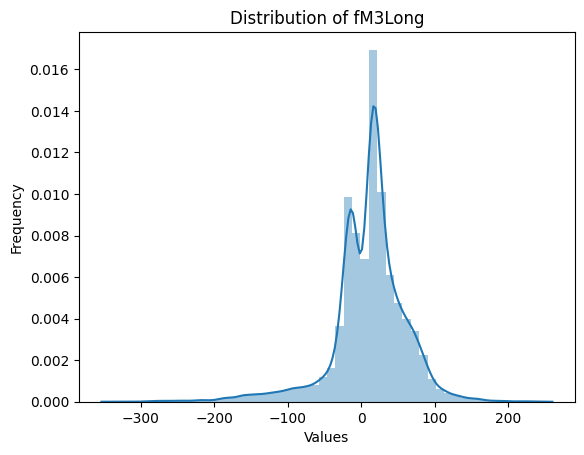

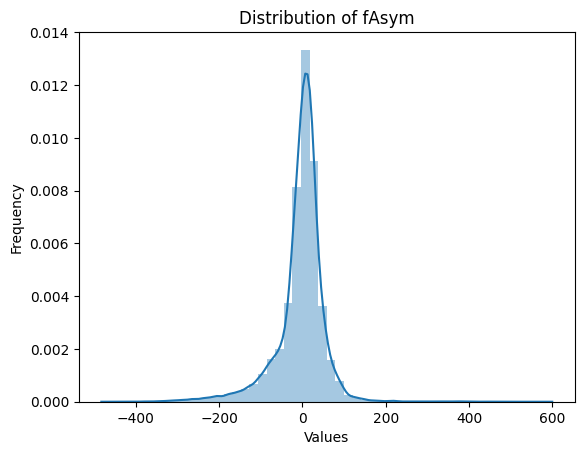

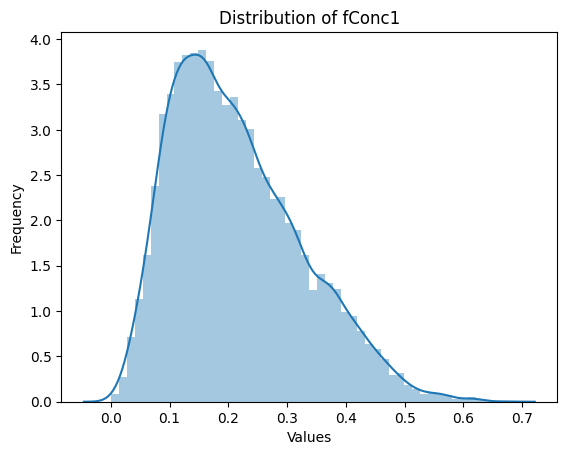

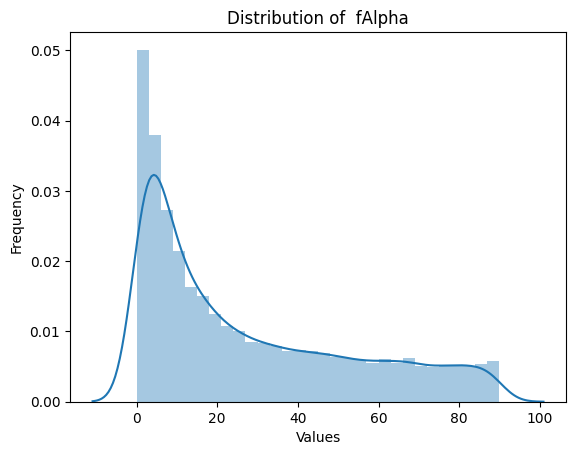

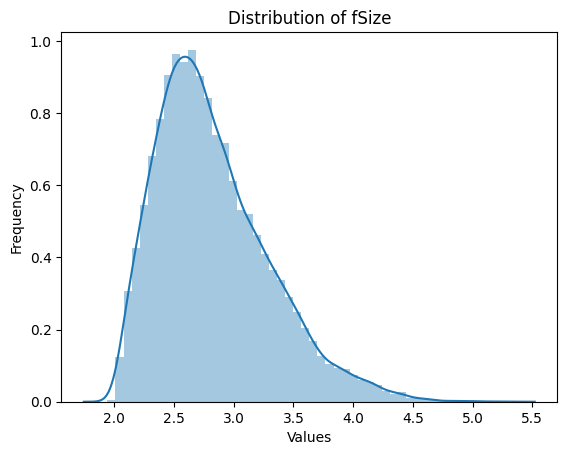

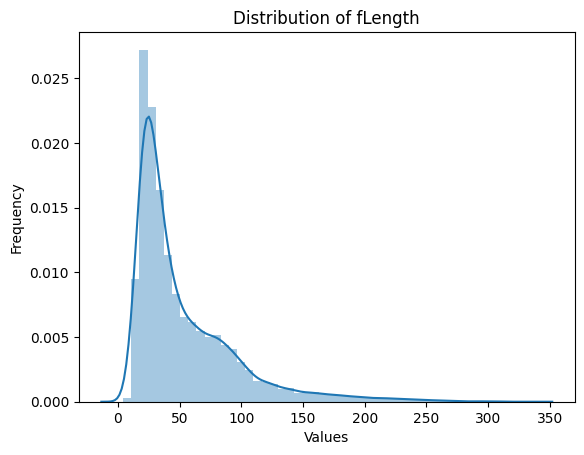

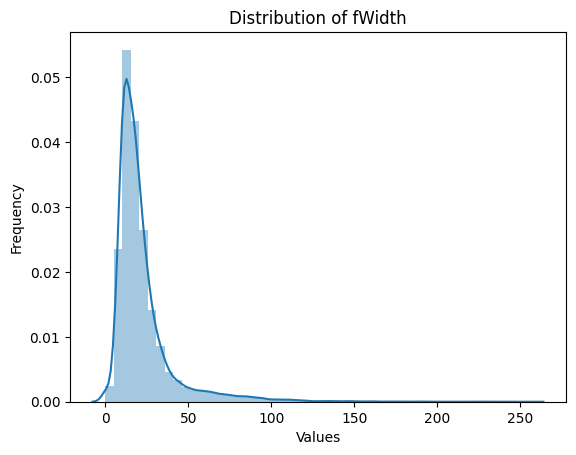

In [ ]:
df_encoded1 = df_encoded.copy() # making a copy so we save the previous data

cols_distplot = ['fM3Long', 'fAsym','fConc1', ' fAlpha', 'fSize', 'fLength', 'fWidth']

for column in cols_distplot:
  sns.distplot(df_encoded1[column])
  plt.title(f'Distribution of {column}')
  plt.xlabel('Values')
  plt.ylabel('Frequency')
  plt.show()

We can pairplot the values to check for outliers. However, given the nature of the data, we won't be dealing with them now.

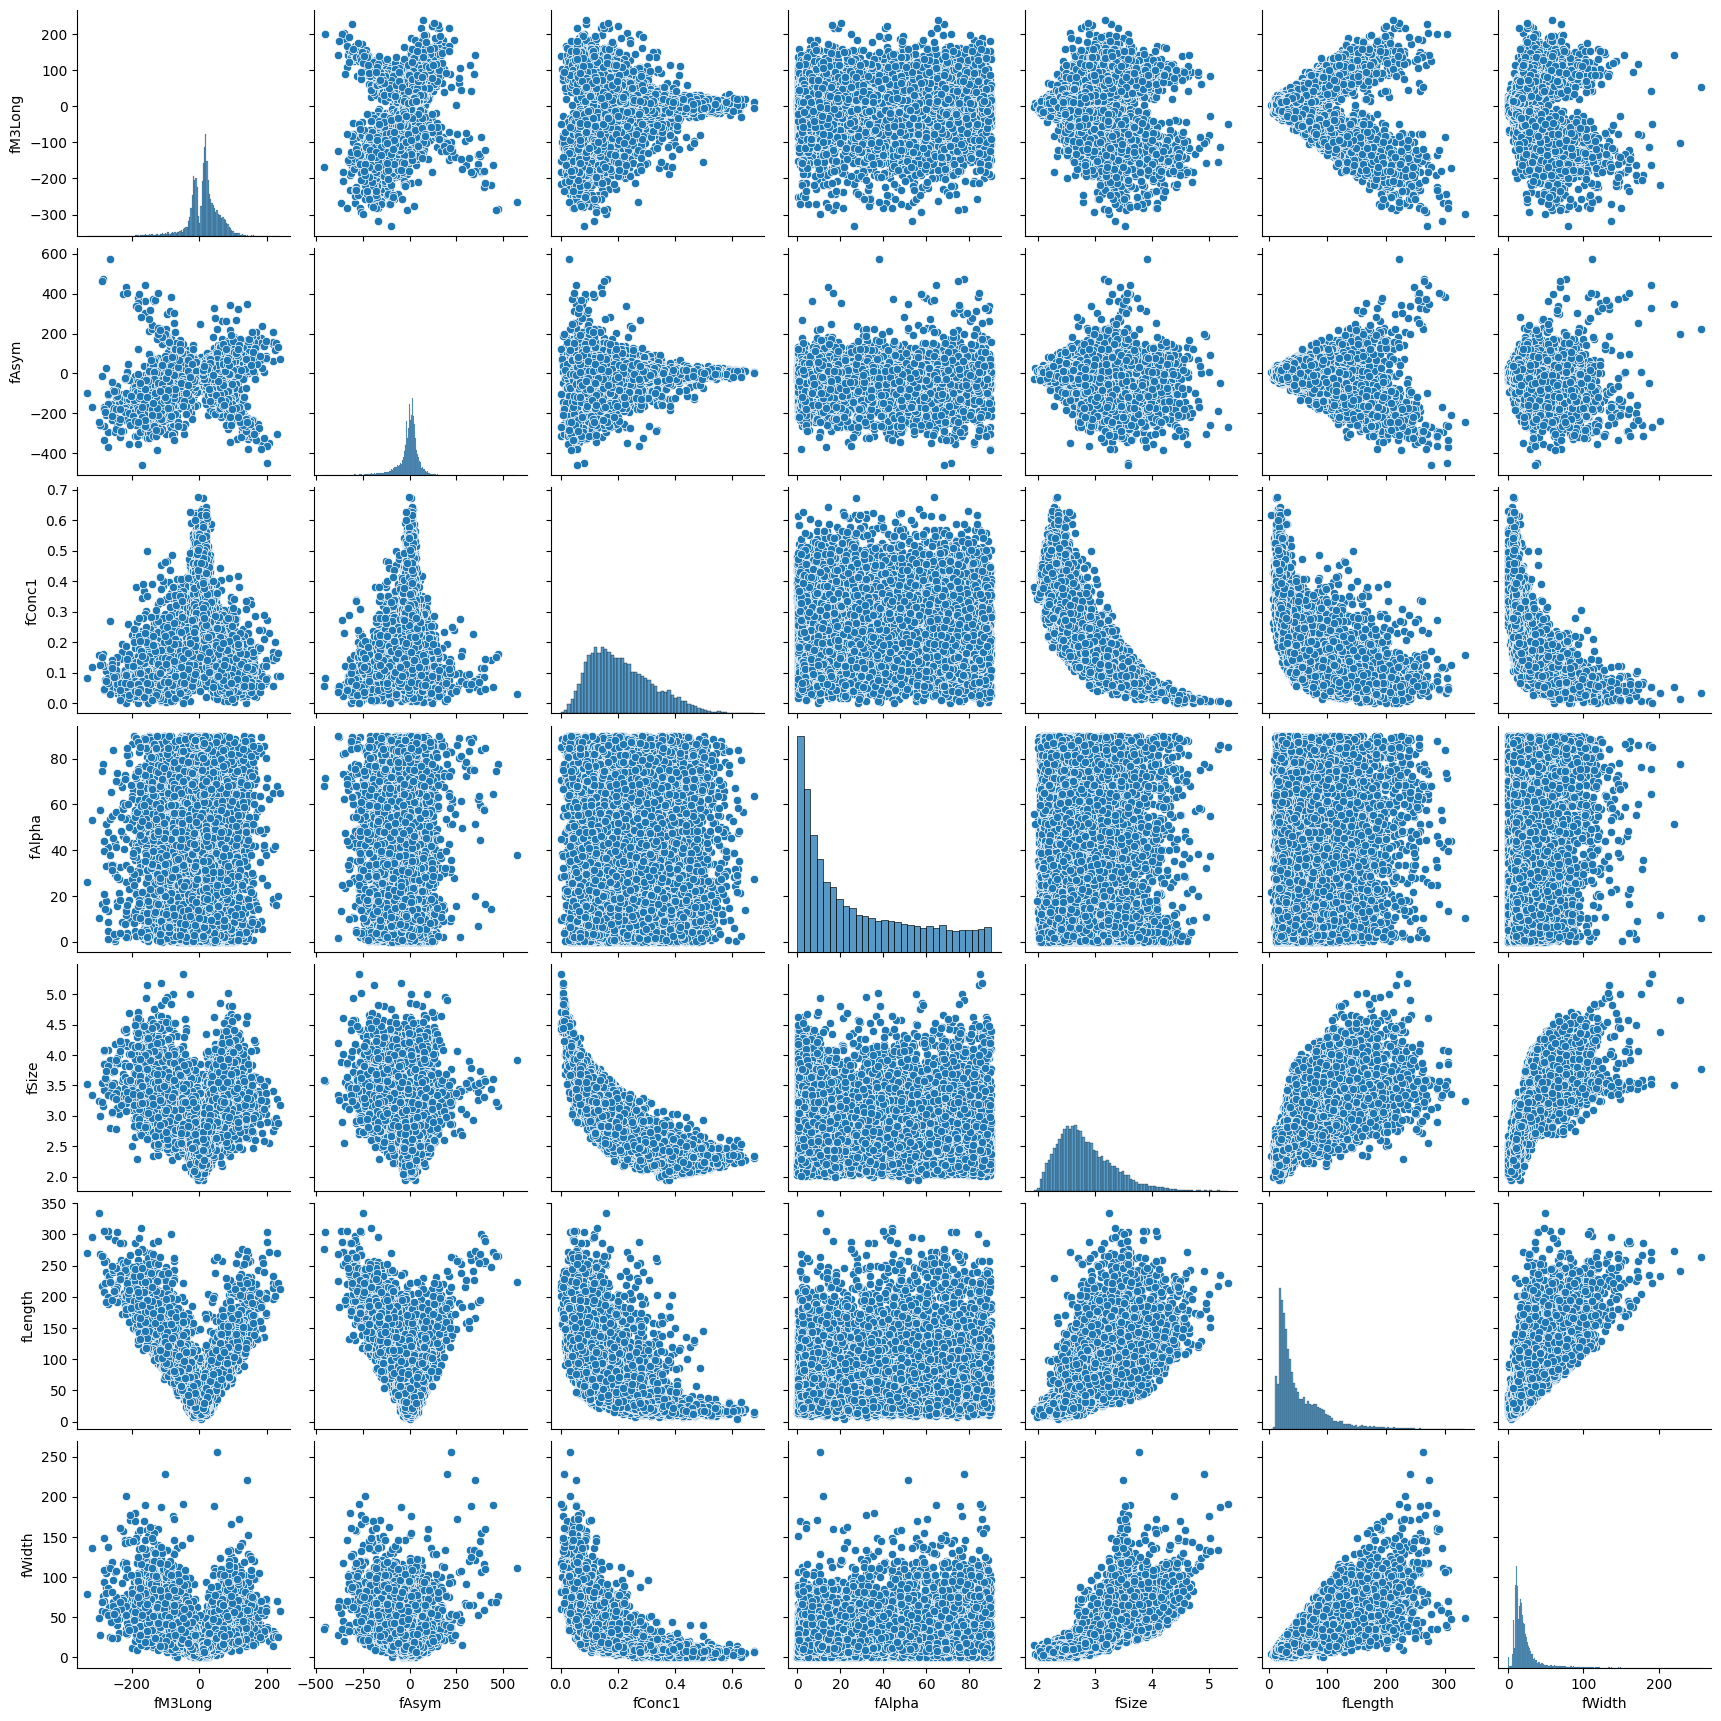

In [ ]:
sns.pairplot(df_encoded1[['fM3Long', 'fAsym', 'fConc1', ' fAlpha', 'fSize', 'fLength', 'fWidth']])
plt.show()

Finally, we can check the data in a histogram format for analysis.

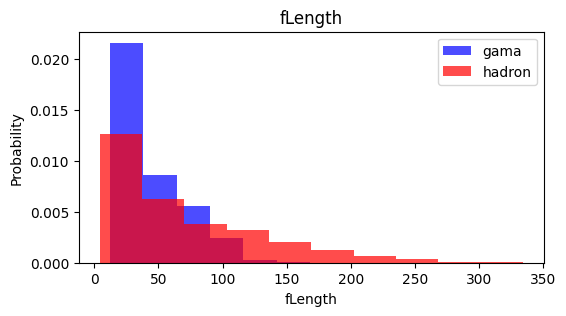

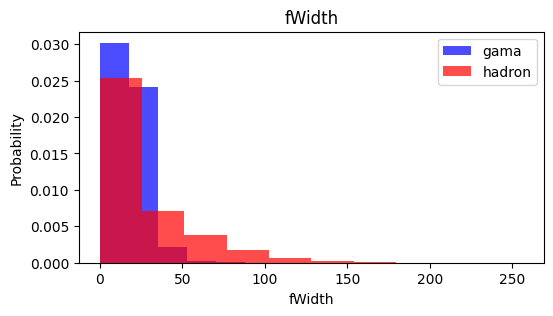

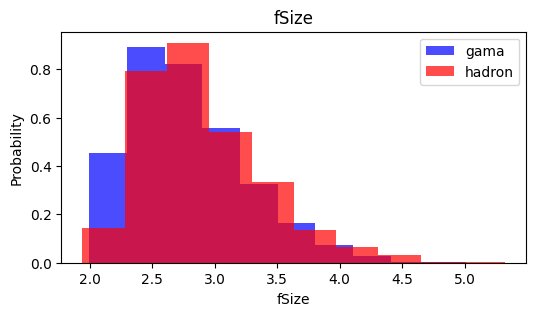

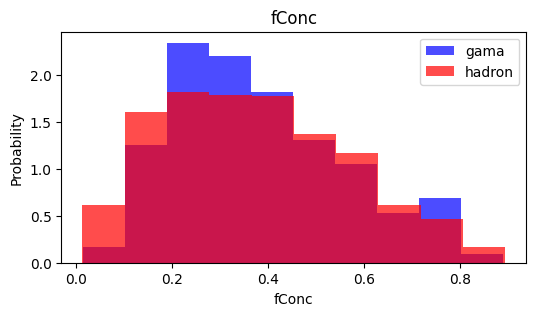

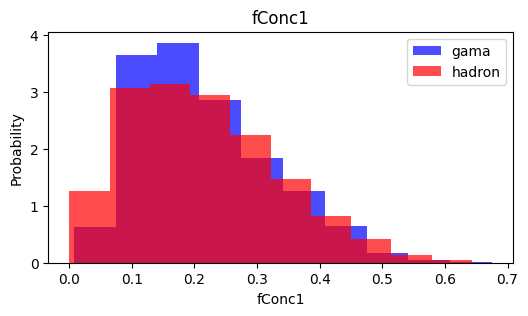

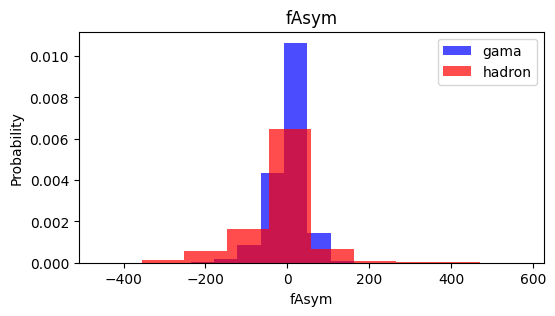

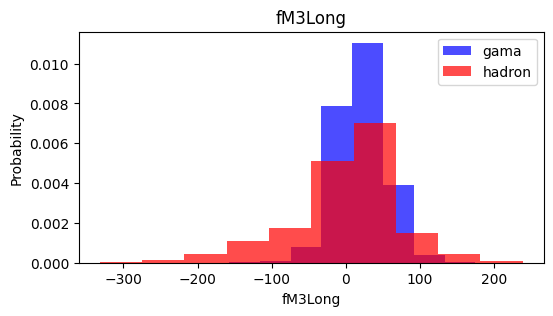

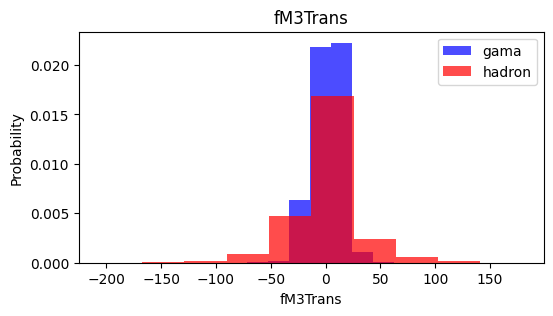

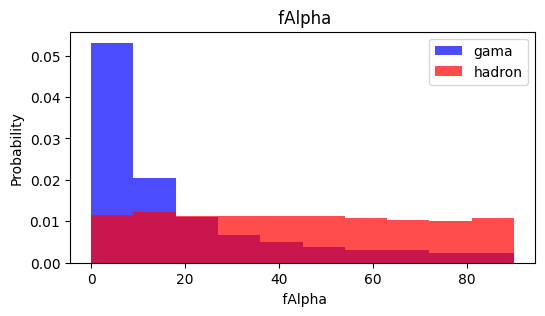

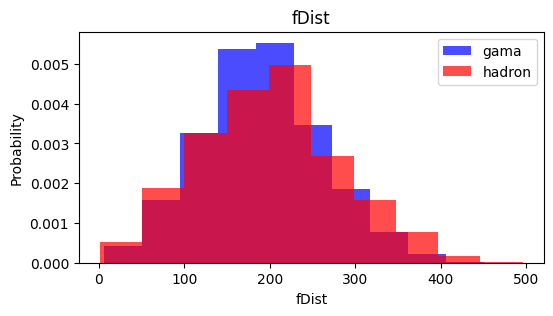

In [ ]:
for label in cols[:-1]:
  plt.figure(figsize=(6, 3))
  plt.hist(df_encoded[df_encoded['class_g']==1][label], color='blue', label='gama', alpha=0.7, density=True)
  plt.hist(df_encoded[df_encoded['class_h']==1][label], color='red', label='hadron', alpha=0.7, density=True)
  plt.title(label)
  plt.xlabel(label)
  plt.ylabel('Probability')
  plt.legend()
  plt.show()

In this data, we can see in a sample that some features are in the 100's (100.00) house and another in the decimals' (0.1).

It is importante to have it evenly distributed (normal distribution) so we achieve a standard deviation.

For that to be true, we'll create a function as it follows:

In [ ]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values # check all the values up to the last one
  y = dataframe[dataframe.columns[-1]].values # indexes in the last column

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

<h2> Train, validadation and test datasets

We'll set the training at 60% of the df, the validation at 20% and the final test df at 10%.

In [ ]:
train, val, test = np.split(df1.sample(frac=1), [int(0.6 * len(df1)), int(0.8 * len(df1))])

Let's have a look in the length of the training dataset, particularly at the 2 target columns:

In [ ]:
print(len(train[train["class"]==1]))
print(len(train[train["class"]==0]))

7450
3961


In [ ]:
train, X_train, y_train = scale_dataset(train, oversample=True) # as the function 'scale_dataset()' returns 3 values, they'll be stored in their respective variables
val, X_val, y_val = scale_dataset(val, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

<h2>KNN</h2>

We're going to perform KNN do determine our targets.

Here's a simple explanation about it:

K-nearest neighbors (KNN) is a simple yet effective machine learning algorithm used for both classification and regression tasks.

It operates based on the principle that similar data points are likely to belong to the same class or have similar properties. In classification, when presented with a new input, KNN identifies its k-nearest neighbors (data points with the most similar features) from the training set based on a chosen distance metric (such as Euclidean distance) and assigns the majority class among these neighbors to the new input.

In regression, KNN predicts the output by averaging or considering the values of the k-nearest neighbors. KNN's performance heavily depends on the choice of k (the number of neighbors) and the distance metric used, making it sensitive to noisy data and computationally expensive for large datasets during prediction.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier # our model will classify
from sklearn.metrics import classification_report

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = knn_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.75      0.74      1330
           1       0.86      0.86      0.86      2474

    accuracy                           0.82      3804
   macro avg       0.80      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



Now our model is trained, validated and we tested it. Above, we can see the prediction results and the precision on finding weather the sample is g (1) or h (0) based on the given features.

<head>
  <title>Naive Bayes Probability Function</title>
</head>
<body>
  <h2>Naive Bayes Probability Function</h2>
  <p>The Naive Bayes classifier is based on Bayes' theorem and assumes independence among features. The probability function used in Naive Bayes classification can be derived from Bayes' theorem.</p>

  <p>Let's denote:</p>
  <ul>
    <li>P(C<sub>k</sub> | x<sub>1</sub>, x<sub>2</sub>, ..., x<sub>n</sub>): Probability of class C<sub>k</sub> given the features x<sub>1</sub>, x<sub>2</sub>, ..., x<sub>n</sub>.</li>
    <li>P(C<sub>k</sub>): Prior probability of class C<sub>k</sub>.</li>
    <li>P(x<sub>1</sub>, x<sub>2</sub>, ..., x<sub>n</sub> | C<sub>k</sub>): Likelihood of features given class C<sub>k</sub>.</li>
    <li>P(x<sub>1</sub>, x<sub>2</sub>, ..., x<sub>n</sub>): Probability of observing the features x<sub>1</sub>, x<sub>2</sub>, ..., x<sub>n</sub>.</li>
  </ul>

  <p>Then, according to Bayes' theorem:</p>
  <p>P(C<sub>k</sub> | x<sub>1</sub>, x<sub>2</sub>, ..., x<sub>n</sub>) = P(C<sub>k</sub>) &bull; P(x<sub>1</sub>, x<sub>2</sub>, ..., x<sub>n</sub> | C<sub>k</sub>) / P(x<sub>1</sub>, x<sub>2</sub>, ..., x<sub>n</sub>)</p>

  <p>In Naive Bayes, the assumption of feature independence simplifies the likelihood term:</p>
  <p>P(x<sub>1</sub>, x<sub>2</sub>, ..., x<sub>n</sub> | C<sub>k</sub>) = P(x<sub>1</sub> | C<sub>k</sub>) &bull; P(x<sub>2</sub> | C<sub>k</sub>) &bull; ... &bull; P(x<sub>n</sub> | C<sub>k</sub>)</p>

  <p>The probability function for Naive Bayes classification involves calculating the prior probabilities P(C<sub>k</sub>) for each class and the likelihoods P(x<sub>i</sub> | C<sub>k</sub>) for each feature given each class. These probabilities are then used in the above formula to compute the posterior probability of each class given the observed features.</p>

  <p>Note: The specific implementation and calculation of these probabilities can vary based on the type of Naive Bayes (e.g., Gaussian Naive Bayes, Multinomial Naive Bayes, etc.) and the nature of the features (continuous, categorical, etc.) in the dataset.</p>
</body>



In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [ ]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.42      0.52      1330
           1       0.74      0.91      0.82      2474

    accuracy                           0.74      3804
   macro avg       0.73      0.66      0.67      3804
weighted avg       0.73      0.74      0.71      3804



The model looks slightly worst compared to the KNN model.

<head>
  <title>Logistic Regression Overview</title>
</head>
<body>
  <h2>Overview of Logistic Regression</h2>
  <p>Logistic Regression is a statistical method used for binary classification, predicting the probability of a categorical dependent variable (usually coded as 0 or 1) based on one or more independent variables. Despite its name, Logistic Regression is a classification algorithm, not a regression one. It's widely used in various fields, including healthcare, finance, and natural language processing.</p>

  <h3>General Idea of Logistic Regression</h3>
  <p>Logistic Regression models the probability that a given input belongs to a certain category or class. It predicts the probability using a logistic function (also known as the sigmoid function), which maps any real-valued number to the range [0, 1]. This predicted probability is then converted to class labels by applying a threshold (usually 0.5), where values above the threshold are classified into one category, and values below the threshold belong to the other category.</p>

  <h3>Mathematical Formula</h3>
  <p>For a single binary outcome (0 or 1), the Logistic Regression model's mathematical formula can be expressed as:</p>
  <p>Assuming:
    <ul>
      <li>X represents the input features (independent variables),</li>
      <li>Y represents the binary categorical outcome (dependent variable),</li>
      <li>b<sub>0</sub> represents the intercept term,</li>
      <li>b<sub>1</sub>, b<sub>2</sub>, ..., b<sub>n</sub> are the coefficients of the independent variables.</li>
    </ul>
  </p>
  <p>The logistic regression model is expressed as:</p>
  <p>P(Y=1|X) = 1 / (1 + e<sup>-(b<sub>0</sub> + b<sub>1</sub>X<sub>1</sub> + b<sub>2</sub>X<sub>2</sub> + ... + b<sub>n</sub>X<sub>n</sub>)</sup>)</p>
  <p>Where:
    <ul>
      <li>P(Y=1|X) is the probability of the dependent variable being 1 given the input features X.</li>
      <li>e is the base of the natural logarithm (Euler's number).</li>
      <li>b<sub>0</sub> is the intercept (bias) term.</li>
      <li>b<sub>1</sub>, b<sub>2</sub>, ..., b<sub>n</sub> are the coefficients of the independent variables.</li>
      <li>X<sub>1</sub>, X<sub>2</sub>, ..., X<sub>n</sub> are the values of the independent variables.</li>
    </ul>
  </p>
  <p>The logistic function 1 / (1 + e<sup>-z</sup>) is an S-shaped curve that transforms any real-valued input z into a value between 0 and 1, representing probabilities. The values of b<sub>0</sub>, b<sub>1</sub>, ..., b<sub>n</sub> are estimated from the training data using optimization techniques like maximum likelihood estimation or gradient descent.</p>
  <p>During model training, the goal is to find the optimal values of coefficients that minimize the error between predicted probabilities and actual class labels in the training data.</p>
  <p>Logistic Regression is a foundational and interpretable algorithm widely used for binary classification tasks due to its simplicity and effectiveness in modeling the relationship between input features and categorical outcomes.</p>
</body>

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)

In [ ]:
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.74      0.71      1330
           1       0.85      0.82      0.84      2474

    accuracy                           0.79      3804
   macro avg       0.77      0.78      0.78      3804
weighted avg       0.80      0.79      0.79      3804



<h2>SVMs</h2>

Not robust when dealing with outliers.
Key Concepts in SVM:
Linear Separability: SVMs work well when classes can be separated by a linear boundary. However, they can also be used with non-linear boundaries using techniques like the kernel trick.

Margin: SVMs aim to maximize the margin, which is the distance between the decision boundary and the nearest data points from each class. Maximizing the margin helps improve the generalization and robustness of the model.

Support Vectors: These are the data points that are closest to the decision boundary. They are crucial in defining the decision boundary and optimizing the margin.

Kernel Trick: SVMs can efficiently handle non-linear decision boundaries in higher-dimensional spaces without explicitly transforming the input data by using kernel functions (e.g., polynomial, radial basis function (RBF), sigmoid).

Workflow of SVM:
Data Preparation: SVMs require data preprocessing and feature scaling for optimal performance, as they're sensitive to feature scales.

Choosing Kernel and Parameters: Selecting an appropriate kernel function (linear, polynomial, RBF, etc.) and tuning hyperparameters (like the regularization parameter C, kernel parameters) is crucial. This step involves cross-validation or grid search.

Model Training: The SVM algorithm finds the optimal hyperplane that separates classes by considering the support vectors and maximizing the margin.

Model Evaluation: Assessing the model's performance using evaluation metrics like accuracy, precision, recall, F1-score, ROC curve, etc.

Advantages of SVMs:
Effective in high-dimensional spaces.
Versatile due to the kernel trick.
Robust against overfitting, especially in high-dimensional space.
Limitations:
Computationally intensive, especially with large datasets.
Difficult to interpret the model's decision boundaries.
SVMs are widely used in various fields such as image classification, text classification, bioinformatics, and more, especially when dealing with complex decision boundaries and smaller datasets.

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [ ]:
y_predict = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.74      0.71      1330
           1       0.85      0.82      0.84      2474

    accuracy                           0.79      3804
   macro avg       0.77      0.78      0.78      3804
weighted avg       0.80      0.79      0.79      3804



<h2>Neural Networks</h2>

In [ ]:
import tensorflow as tf

In [ ]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [ ]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(num_nodes, activation='relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                  metrics=['accuracy'])
  history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
  )

  return nn_model, history

16 nodes, dropout 0, lr 0.01, batch size 32


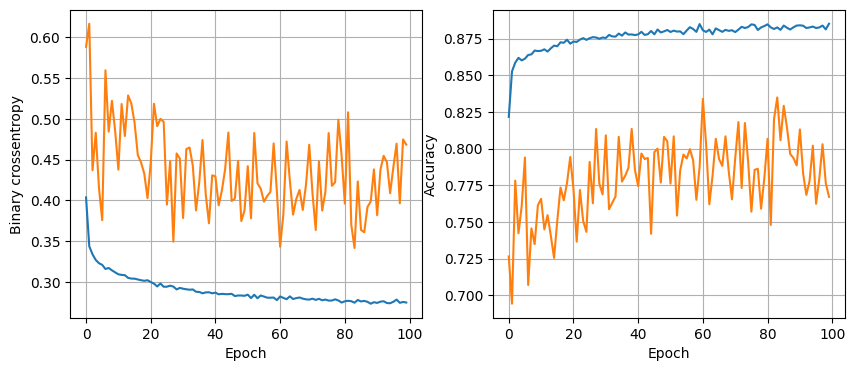

119/119 [==============================] - 0s 3ms/step - loss: 0.3250 - accuracy: 0.8680
16 nodes, dropout 0, lr 0.01, batch size 64


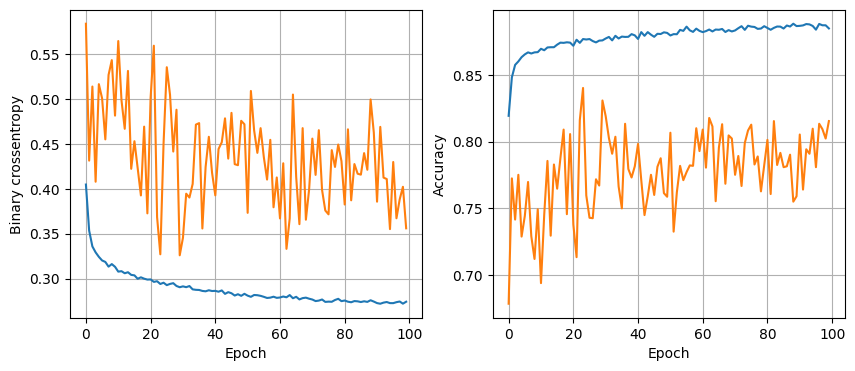

119/119 [==============================] - 0s 2ms/step - loss: 0.3251 - accuracy: 0.8667
16 nodes, dropout 0, lr 0.01, batch size 128


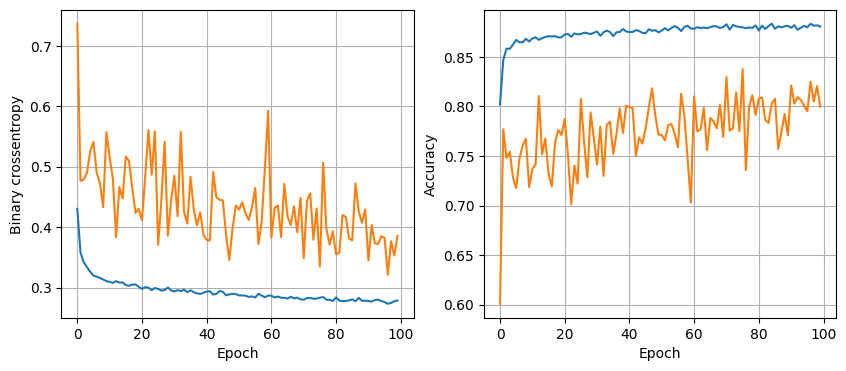

119/119 [==============================] - 0s 2ms/step - loss: 0.3370 - accuracy: 0.8609
16 nodes, dropout 0, lr 0.005, batch size 32


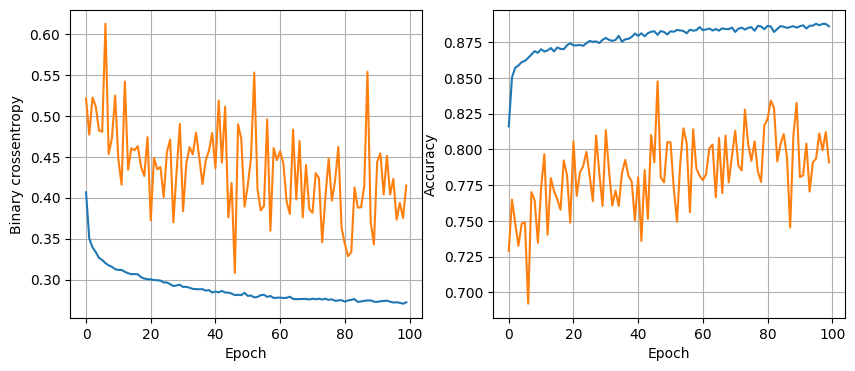

119/119 [==============================] - 0s 3ms/step - loss: 0.3315 - accuracy: 0.8646
16 nodes, dropout 0, lr 0.005, batch size 64


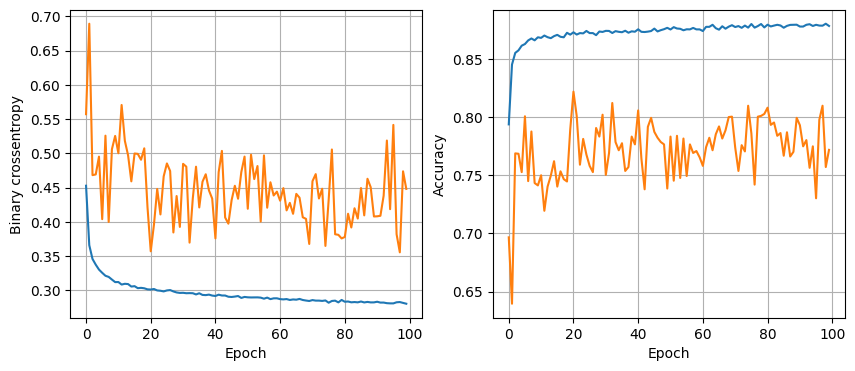

119/119 [==============================] - 0s 2ms/step - loss: 0.3342 - accuracy: 0.8586
16 nodes, dropout 0, lr 0.005, batch size 128


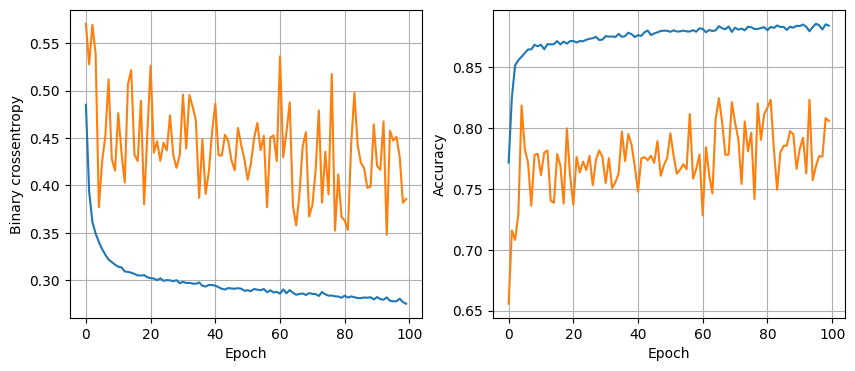

119/119 [==============================] - 0s 3ms/step - loss: 0.3176 - accuracy: 0.8704
16 nodes, dropout 0, lr 0.001, batch size 32


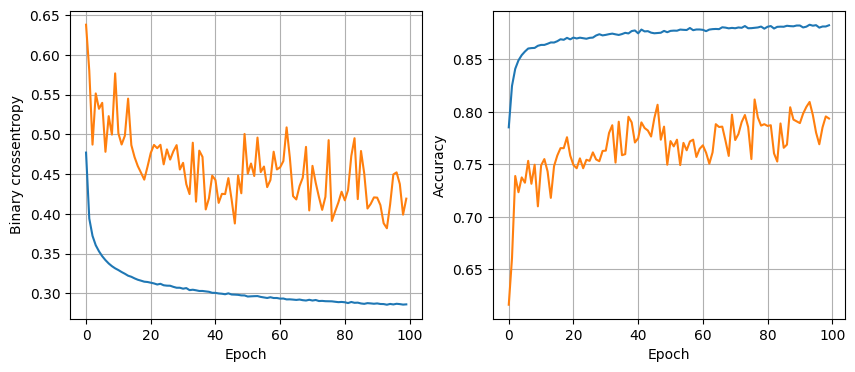

119/119 [==============================] - 0s 3ms/step - loss: 0.3179 - accuracy: 0.8688
16 nodes, dropout 0, lr 0.001, batch size 64


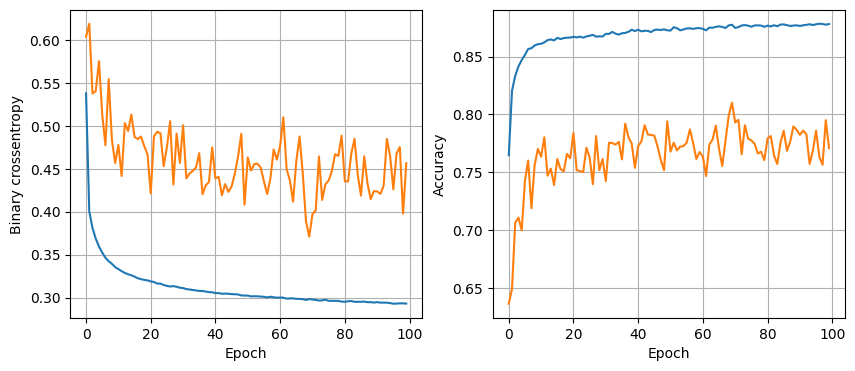

119/119 [==============================] - 0s 3ms/step - loss: 0.3304 - accuracy: 0.8620
16 nodes, dropout 0, lr 0.001, batch size 128


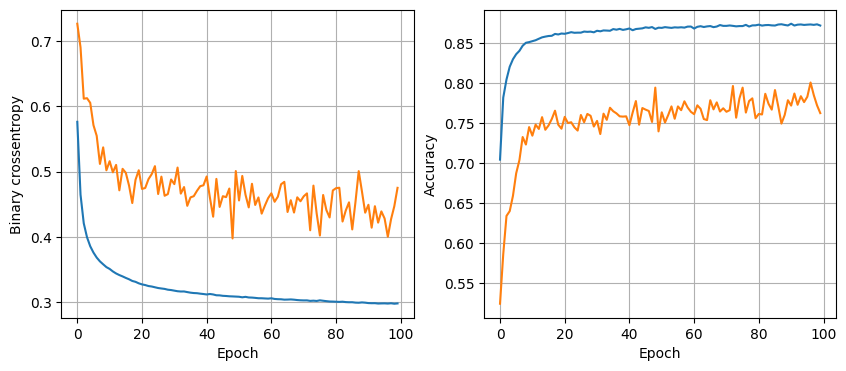

119/119 [==============================] - 0s 3ms/step - loss: 0.3221 - accuracy: 0.8630
16 nodes, dropout 0.2, lr 0.01, batch size 32


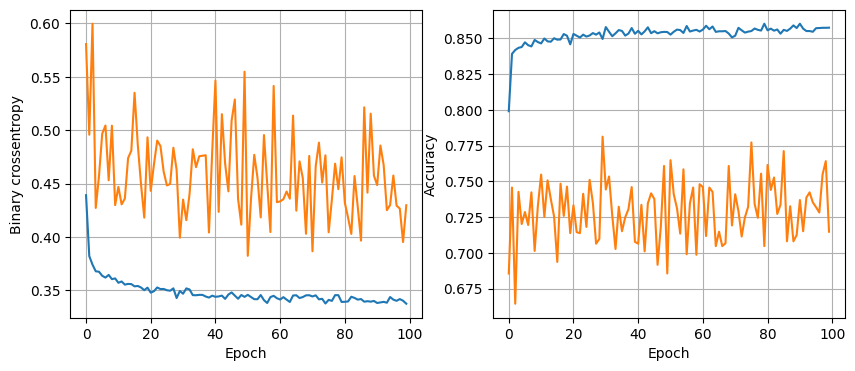

119/119 [==============================] - 0s 3ms/step - loss: 0.3288 - accuracy: 0.8651
16 nodes, dropout 0.2, lr 0.01, batch size 64


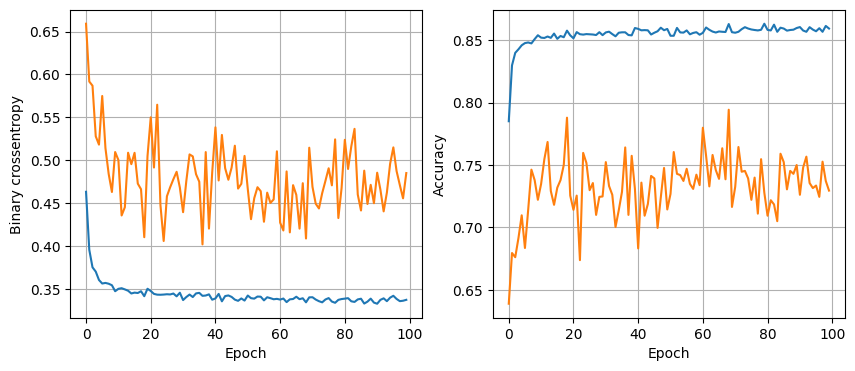

119/119 [==============================] - 0s 3ms/step - loss: 0.3276 - accuracy: 0.8625
16 nodes, dropout 0.2, lr 0.01, batch size 128


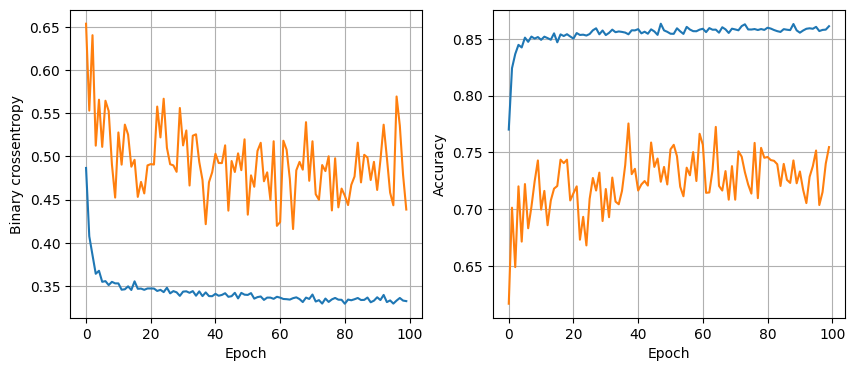

119/119 [==============================] - 0s 3ms/step - loss: 0.3179 - accuracy: 0.8662
16 nodes, dropout 0.2, lr 0.005, batch size 32


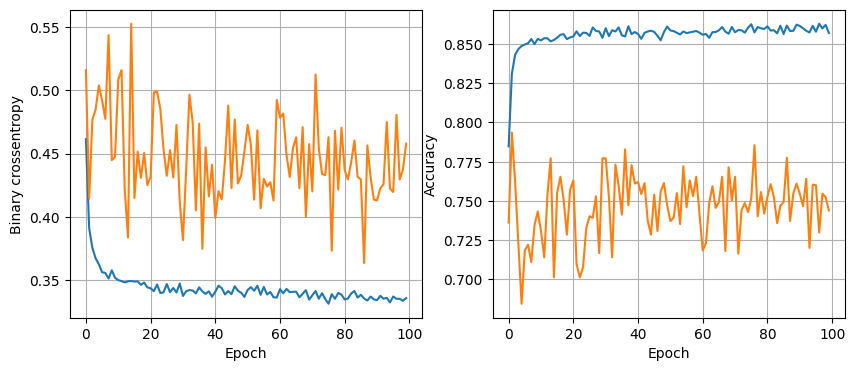

119/119 [==============================] - 0s 3ms/step - loss: 0.3218 - accuracy: 0.8678
16 nodes, dropout 0.2, lr 0.005, batch size 64


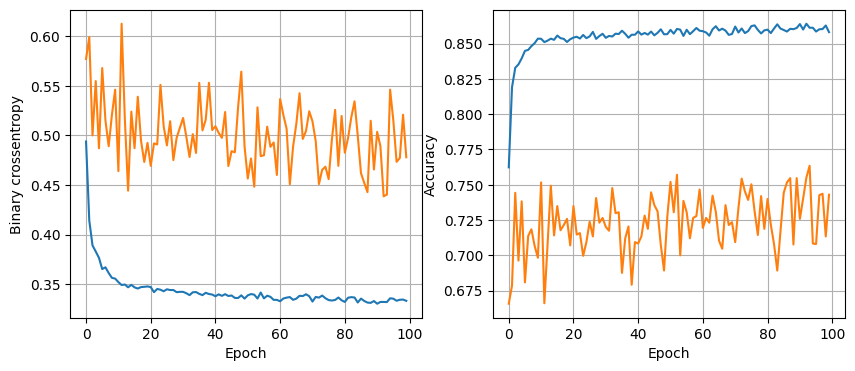

119/119 [==============================] - 0s 3ms/step - loss: 0.3234 - accuracy: 0.8625
16 nodes, dropout 0.2, lr 0.005, batch size 128


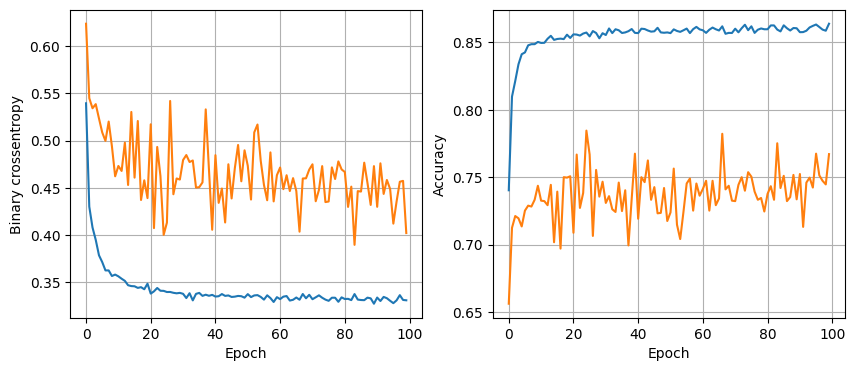

119/119 [==============================] - 0s 3ms/step - loss: 0.3204 - accuracy: 0.8680
16 nodes, dropout 0.2, lr 0.001, batch size 32


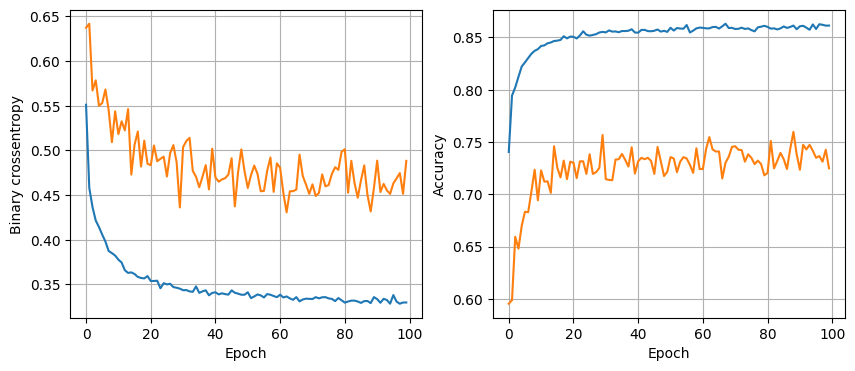

119/119 [==============================] - 0s 4ms/step - loss: 0.3208 - accuracy: 0.8646
16 nodes, dropout 0.2, lr 0.001, batch size 64


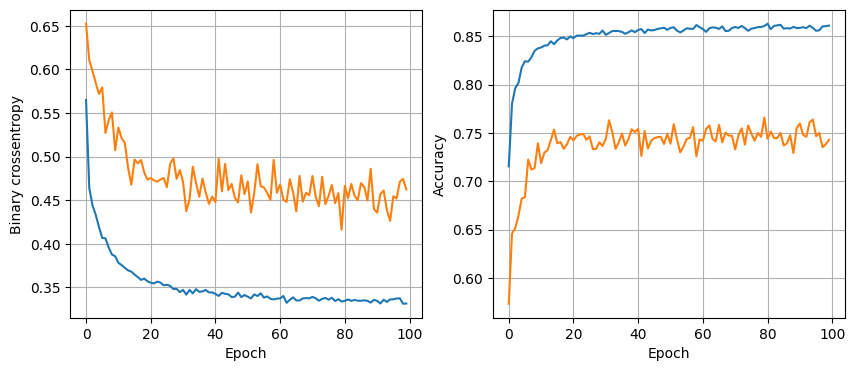

119/119 [==============================] - 0s 3ms/step - loss: 0.3207 - accuracy: 0.8599
16 nodes, dropout 0.2, lr 0.001, batch size 128


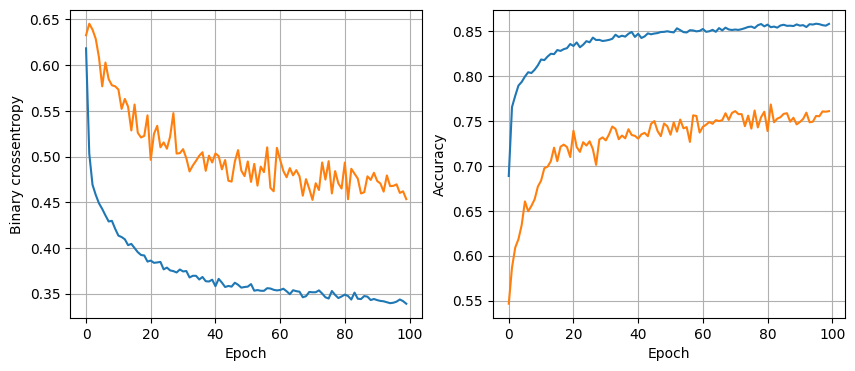

119/119 [==============================] - 0s 3ms/step - loss: 0.3258 - accuracy: 0.8623
32 nodes, dropout 0, lr 0.01, batch size 32


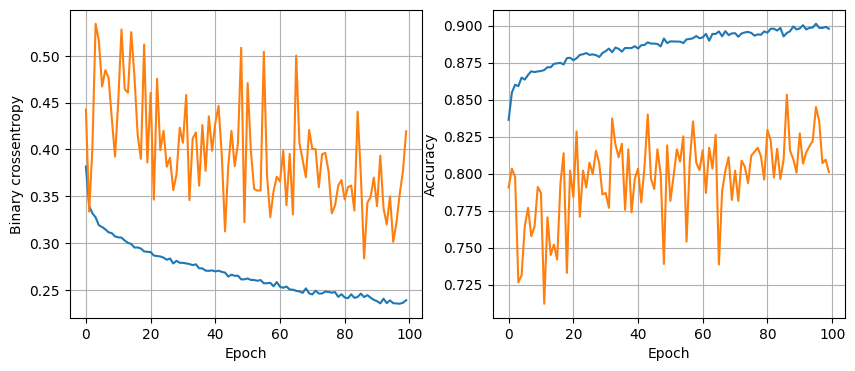

119/119 [==============================] - 0s 3ms/step - loss: 0.4301 - accuracy: 0.8599
32 nodes, dropout 0, lr 0.01, batch size 64


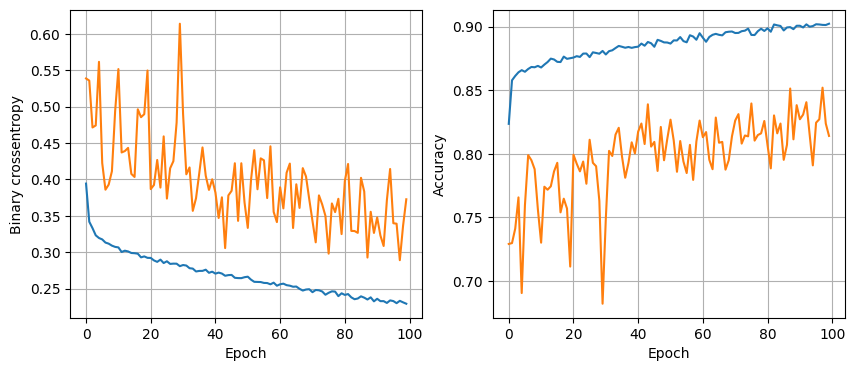

119/119 [==============================] - 0s 3ms/step - loss: 0.3854 - accuracy: 0.8636
32 nodes, dropout 0, lr 0.01, batch size 128


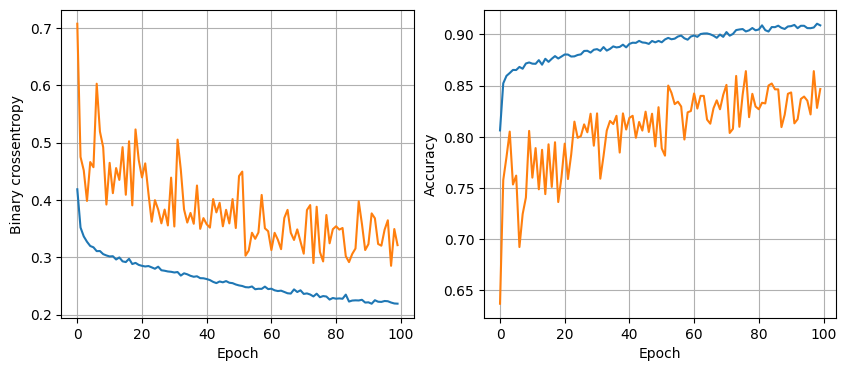

119/119 [==============================] - 1s 4ms/step - loss: 0.4032 - accuracy: 0.8573
32 nodes, dropout 0, lr 0.005, batch size 32


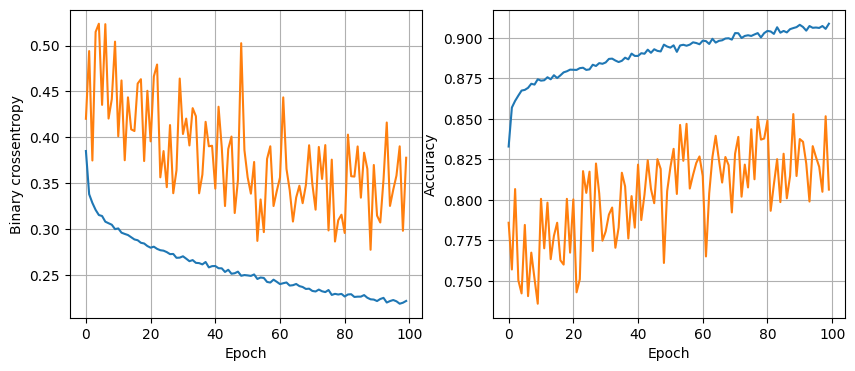

119/119 [==============================] - 0s 3ms/step - loss: 0.3807 - accuracy: 0.8665
32 nodes, dropout 0, lr 0.005, batch size 64


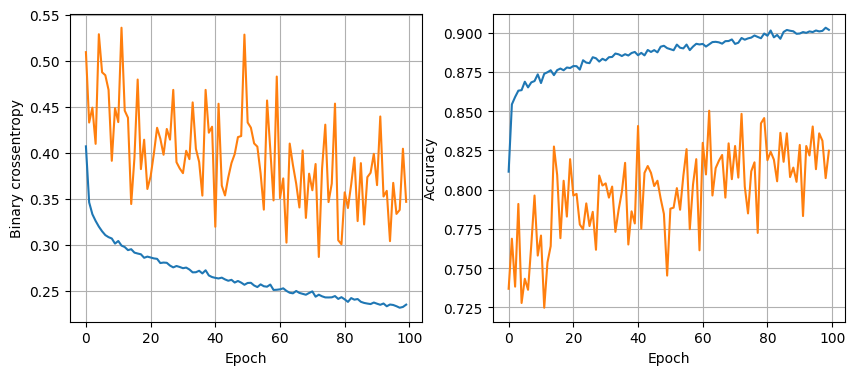

119/119 [==============================] - 0s 3ms/step - loss: 0.3518 - accuracy: 0.8662
32 nodes, dropout 0, lr 0.005, batch size 128


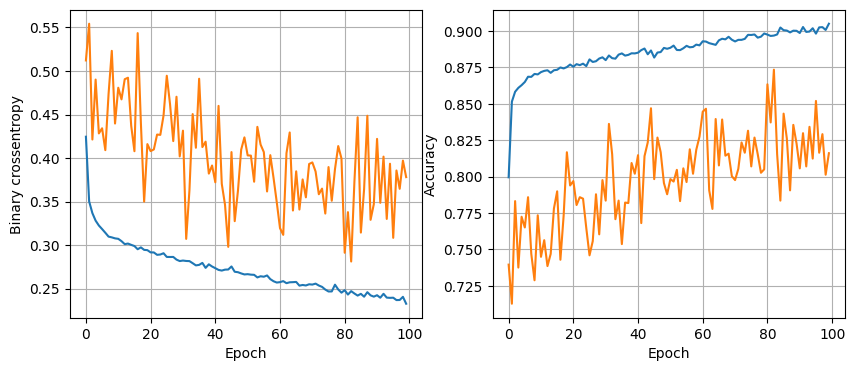

119/119 [==============================] - 0s 4ms/step - loss: 0.3415 - accuracy: 0.8675
32 nodes, dropout 0, lr 0.001, batch size 32


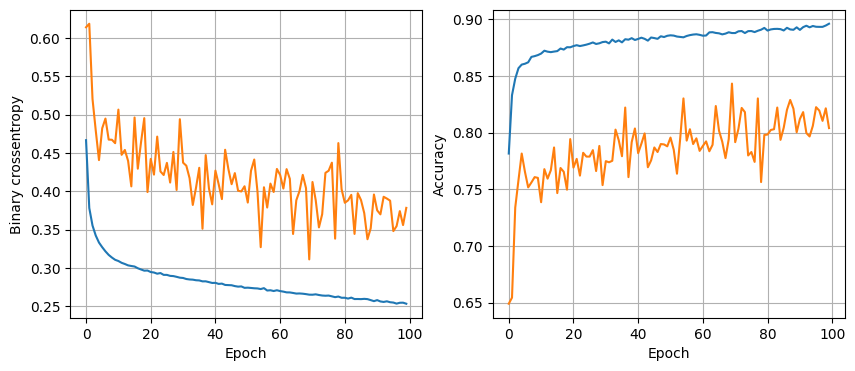

119/119 [==============================] - 0s 3ms/step - loss: 0.3229 - accuracy: 0.8688
32 nodes, dropout 0, lr 0.001, batch size 64


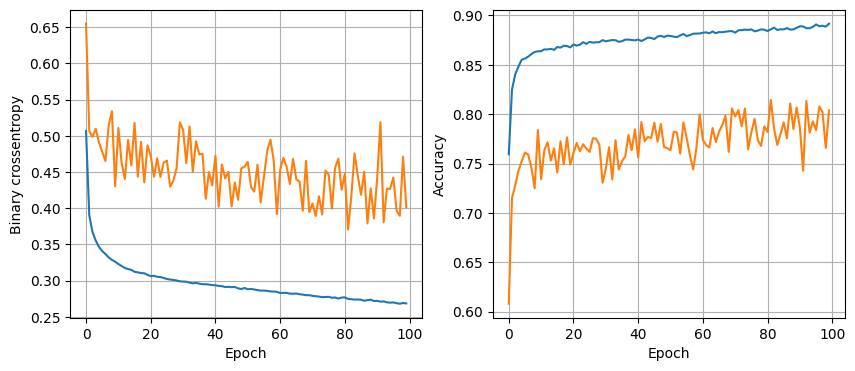

119/119 [==============================] - 0s 3ms/step - loss: 0.3222 - accuracy: 0.8667
32 nodes, dropout 0, lr 0.001, batch size 128


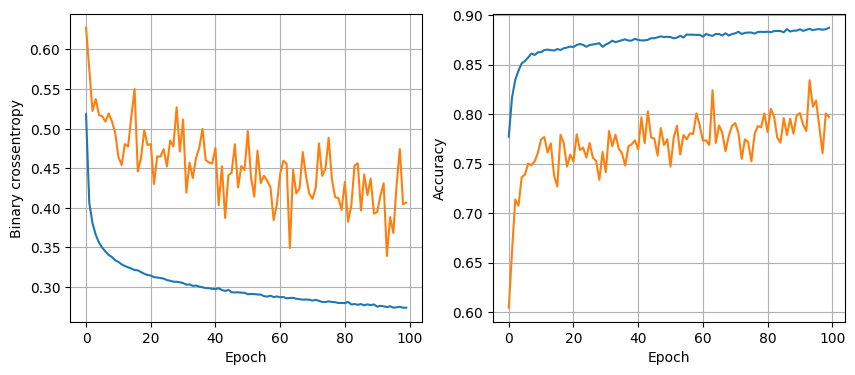

119/119 [==============================] - 0s 3ms/step - loss: 0.3126 - accuracy: 0.8651
32 nodes, dropout 0.2, lr 0.01, batch size 32


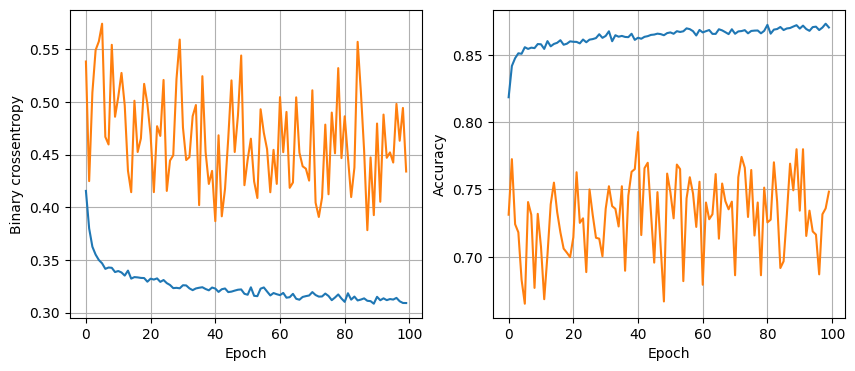

119/119 [==============================] - 0s 3ms/step - loss: 0.3162 - accuracy: 0.8617
32 nodes, dropout 0.2, lr 0.01, batch size 64


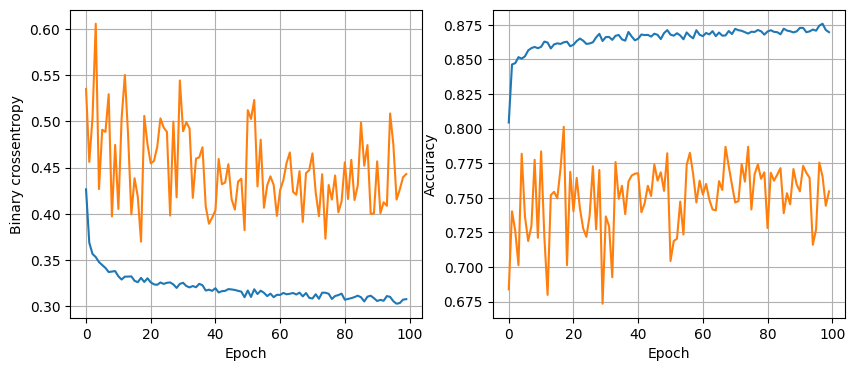

119/119 [==============================] - 0s 3ms/step - loss: 0.3104 - accuracy: 0.8699
32 nodes, dropout 0.2, lr 0.01, batch size 128


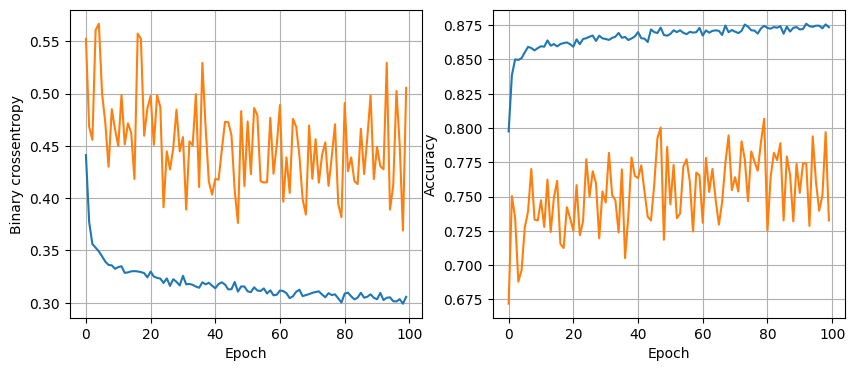

119/119 [==============================] - 0s 3ms/step - loss: 0.3193 - accuracy: 0.8630
32 nodes, dropout 0.2, lr 0.005, batch size 32


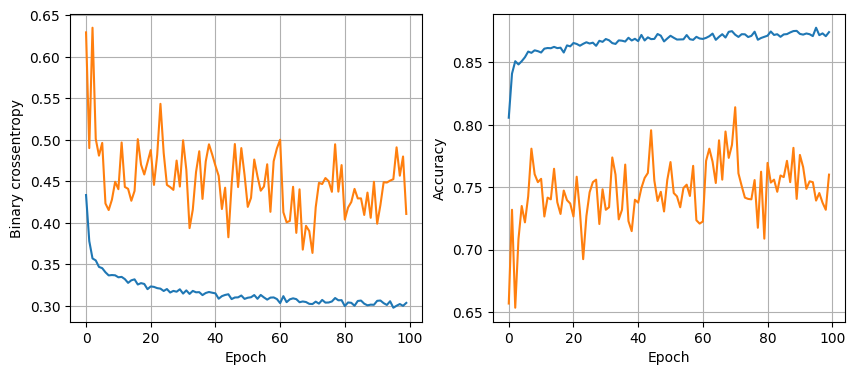

119/119 [==============================] - 0s 3ms/step - loss: 0.3153 - accuracy: 0.8686
32 nodes, dropout 0.2, lr 0.005, batch size 64


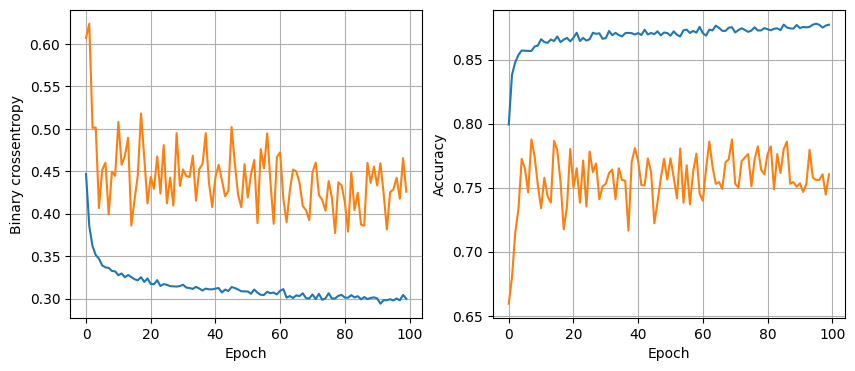

119/119 [==============================] - 0s 3ms/step - loss: 0.3085 - accuracy: 0.8688
32 nodes, dropout 0.2, lr 0.005, batch size 128


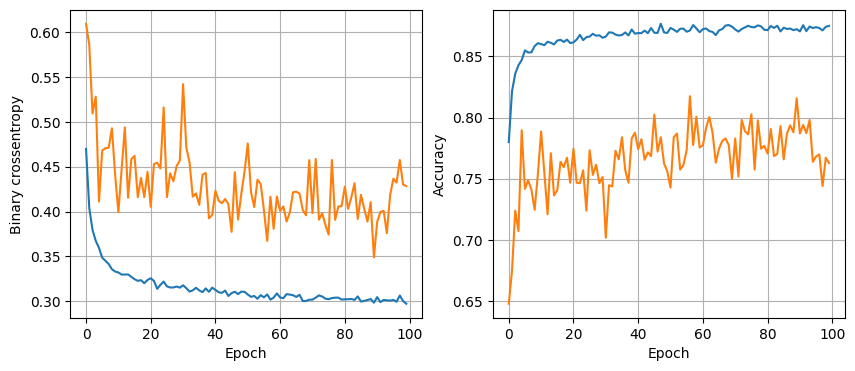

119/119 [==============================] - 0s 3ms/step - loss: 0.3119 - accuracy: 0.8672
32 nodes, dropout 0.2, lr 0.001, batch size 32


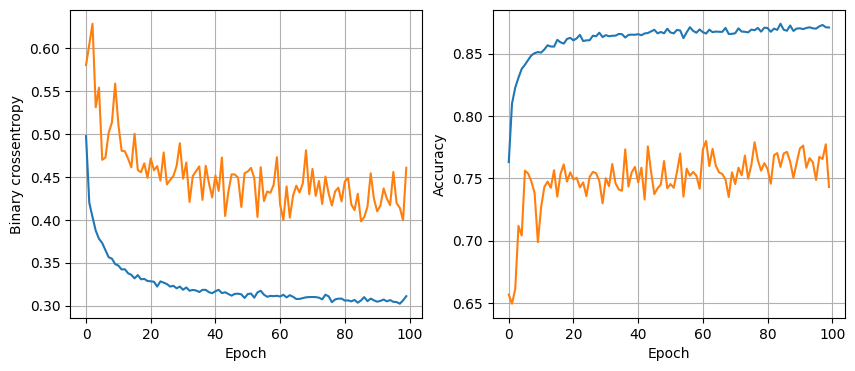

119/119 [==============================] - 0s 3ms/step - loss: 0.3128 - accuracy: 0.8649
32 nodes, dropout 0.2, lr 0.001, batch size 64


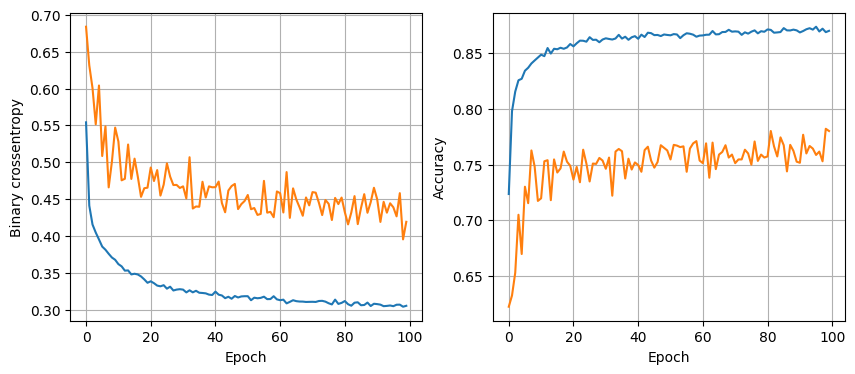

119/119 [==============================] - 0s 4ms/step - loss: 0.3108 - accuracy: 0.8696
32 nodes, dropout 0.2, lr 0.001, batch size 128


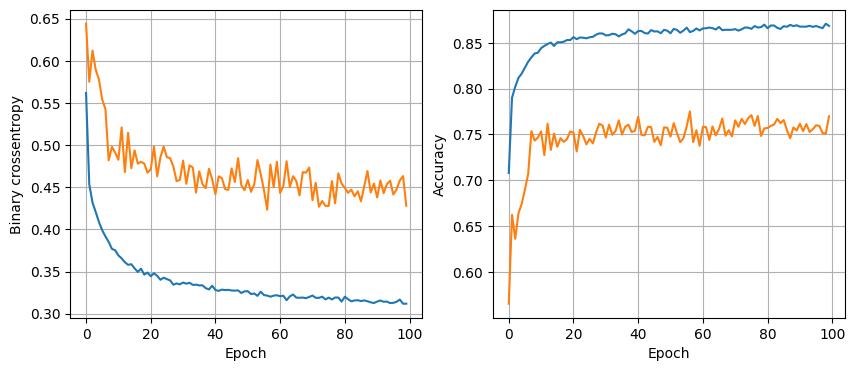

119/119 [==============================] - 0s 3ms/step - loss: 0.3156 - accuracy: 0.8638
64 nodes, dropout 0, lr 0.01, batch size 32


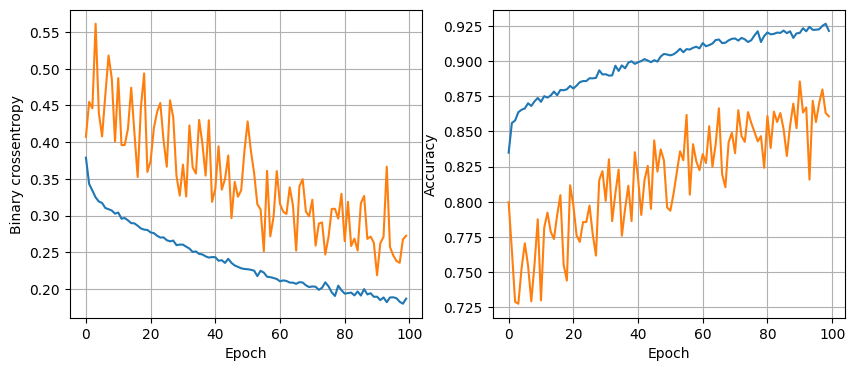

119/119 [==============================] - 0s 3ms/step - loss: 0.5302 - accuracy: 0.8538
64 nodes, dropout 0, lr 0.01, batch size 64


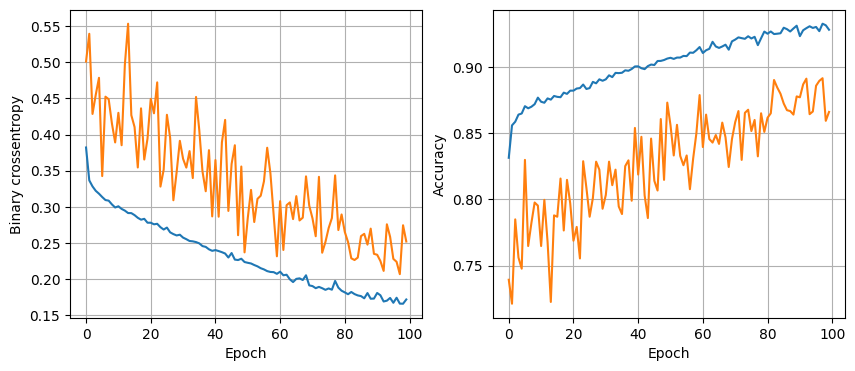

119/119 [==============================] - 0s 3ms/step - loss: 0.5332 - accuracy: 0.8559
64 nodes, dropout 0, lr 0.01, batch size 128


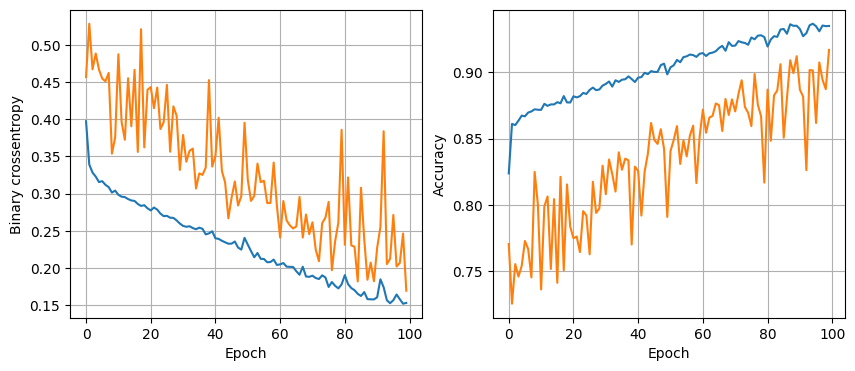

119/119 [==============================] - 0s 3ms/step - loss: 0.5974 - accuracy: 0.8415
64 nodes, dropout 0, lr 0.005, batch size 32


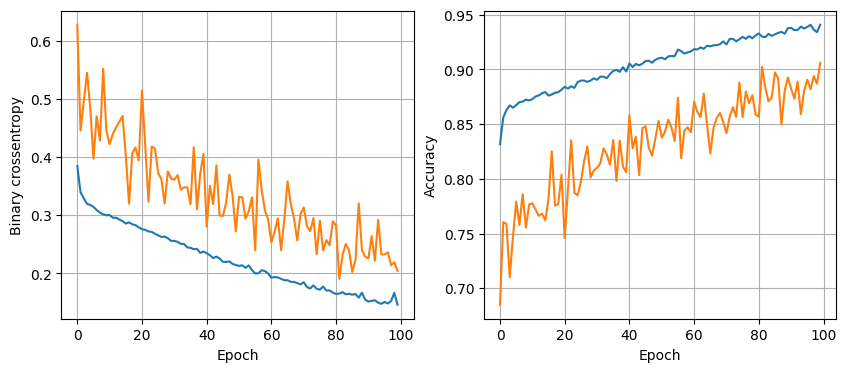

119/119 [==============================] - 0s 3ms/step - loss: 0.5739 - accuracy: 0.8552
64 nodes, dropout 0, lr 0.005, batch size 64


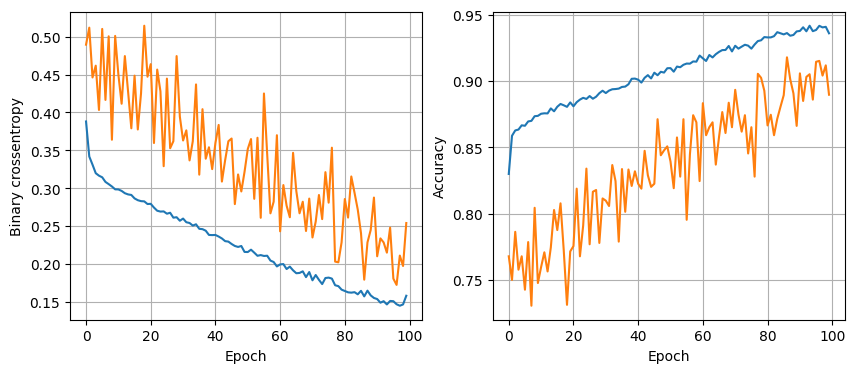

119/119 [==============================] - 0s 3ms/step - loss: 0.5334 - accuracy: 0.8609
64 nodes, dropout 0, lr 0.005, batch size 128


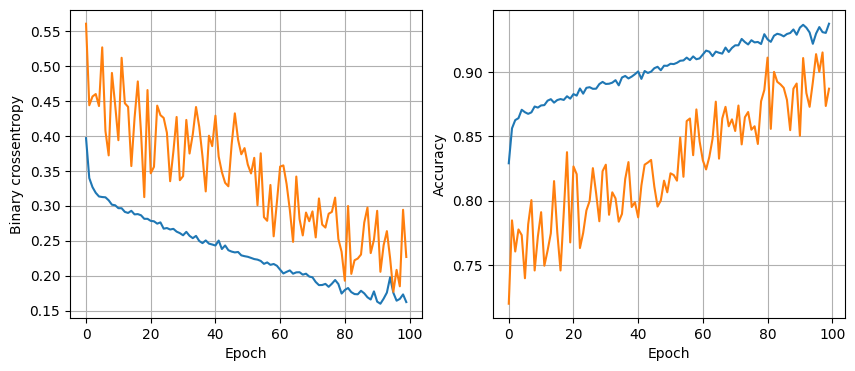

119/119 [==============================] - 0s 3ms/step - loss: 0.4688 - accuracy: 0.8570
64 nodes, dropout 0, lr 0.001, batch size 32


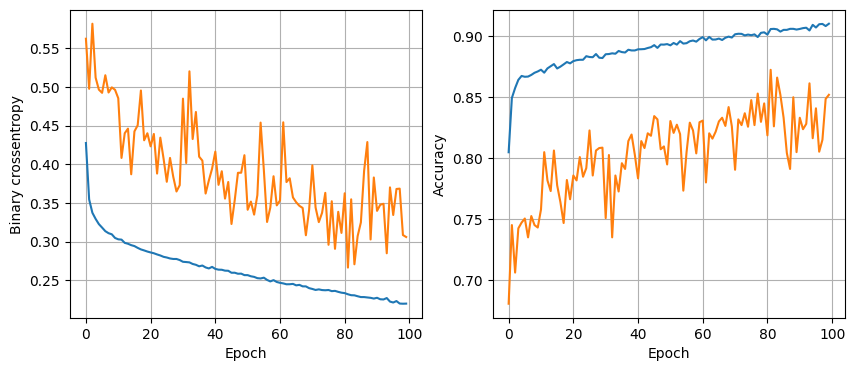

119/119 [==============================] - 1s 4ms/step - loss: 0.3359 - accuracy: 0.8659
64 nodes, dropout 0, lr 0.001, batch size 64


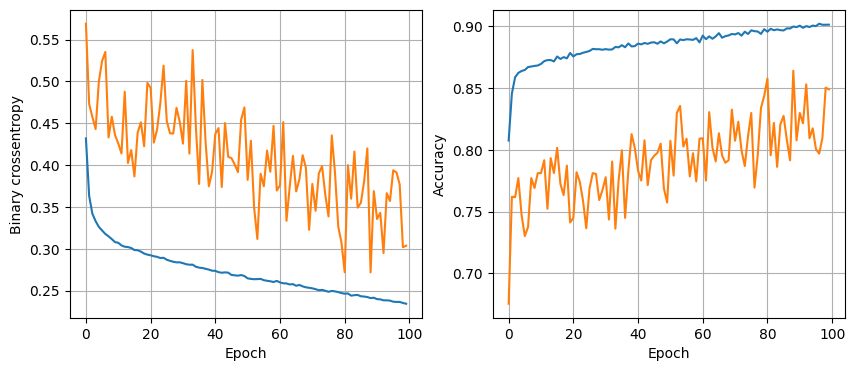

119/119 [==============================] - 0s 3ms/step - loss: 0.3370 - accuracy: 0.8641
64 nodes, dropout 0, lr 0.001, batch size 128


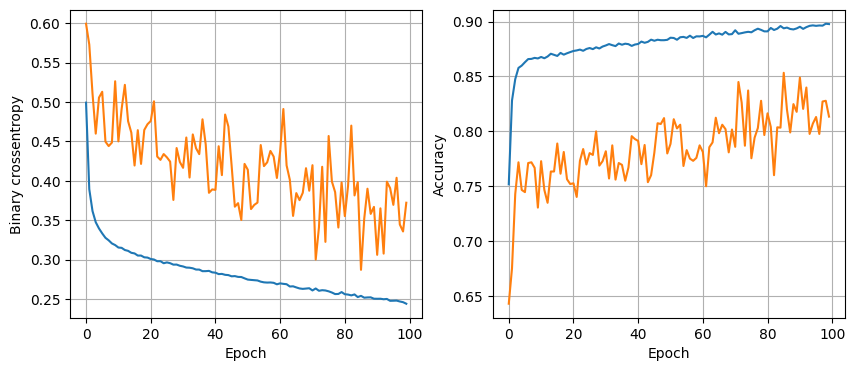

119/119 [==============================] - 0s 3ms/step - loss: 0.3157 - accuracy: 0.8696
64 nodes, dropout 0.2, lr 0.01, batch size 32


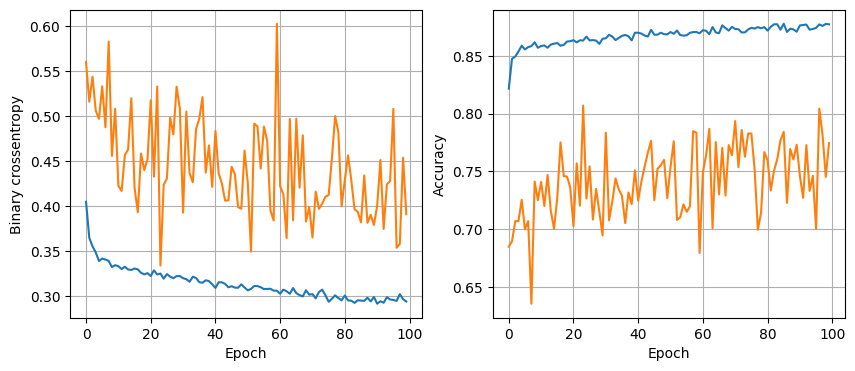

119/119 [==============================] - 0s 3ms/step - loss: 0.3309 - accuracy: 0.8649
64 nodes, dropout 0.2, lr 0.01, batch size 64


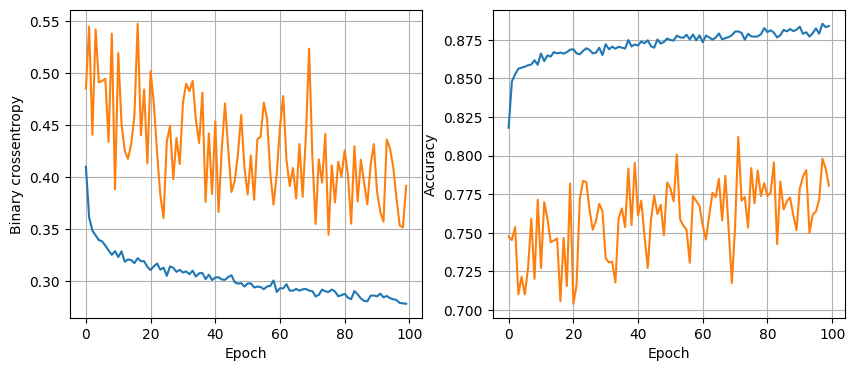

119/119 [==============================] - 0s 3ms/step - loss: 0.3236 - accuracy: 0.8699
64 nodes, dropout 0.2, lr 0.01, batch size 128


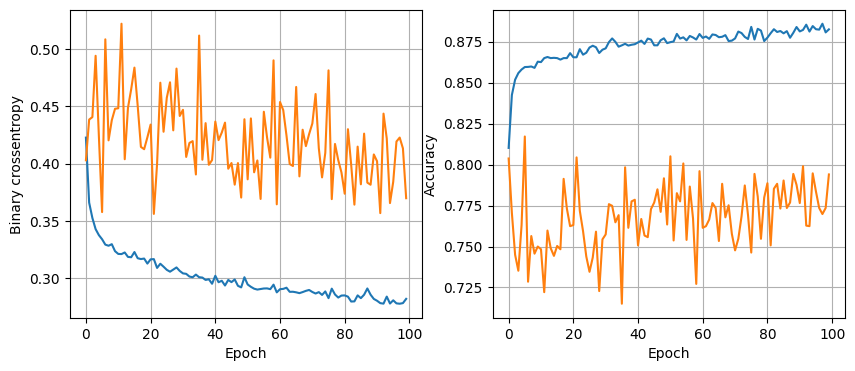

119/119 [==============================] - 0s 3ms/step - loss: 0.3145 - accuracy: 0.8683
64 nodes, dropout 0.2, lr 0.005, batch size 32


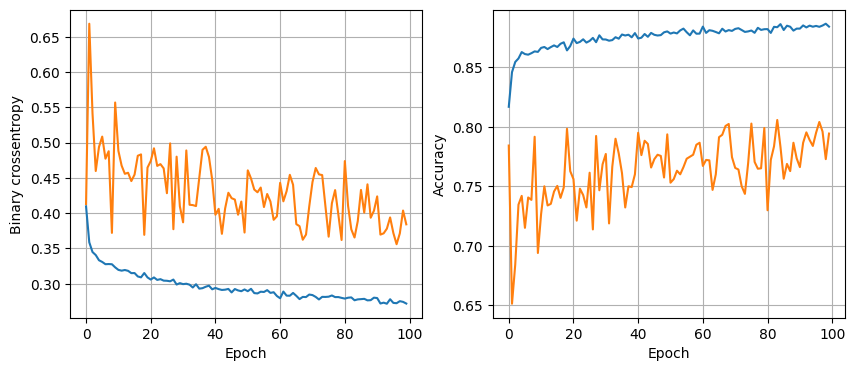

119/119 [==============================] - 0s 3ms/step - loss: 0.3128 - accuracy: 0.8701
64 nodes, dropout 0.2, lr 0.005, batch size 64


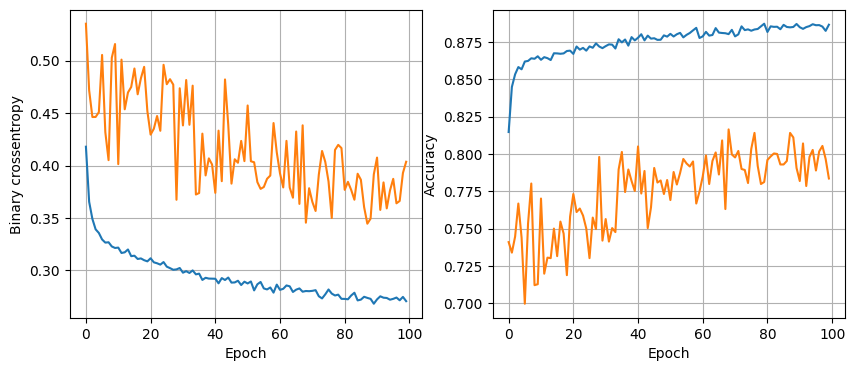

119/119 [==============================] - 0s 3ms/step - loss: 0.3111 - accuracy: 0.8683
64 nodes, dropout 0.2, lr 0.005, batch size 128


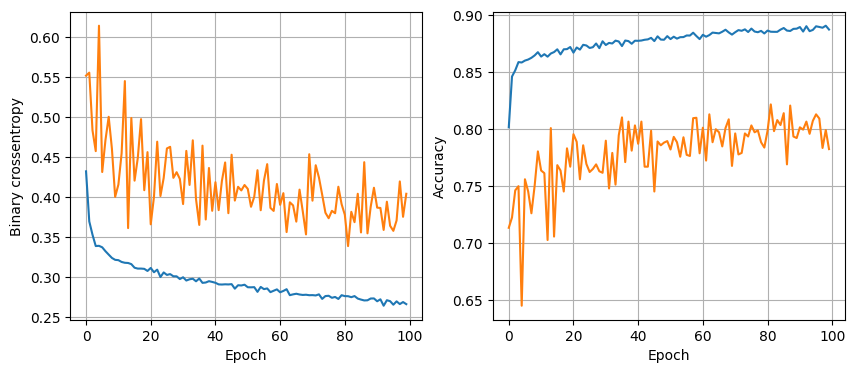

119/119 [==============================] - 0s 3ms/step - loss: 0.3077 - accuracy: 0.8709
64 nodes, dropout 0.2, lr 0.001, batch size 32


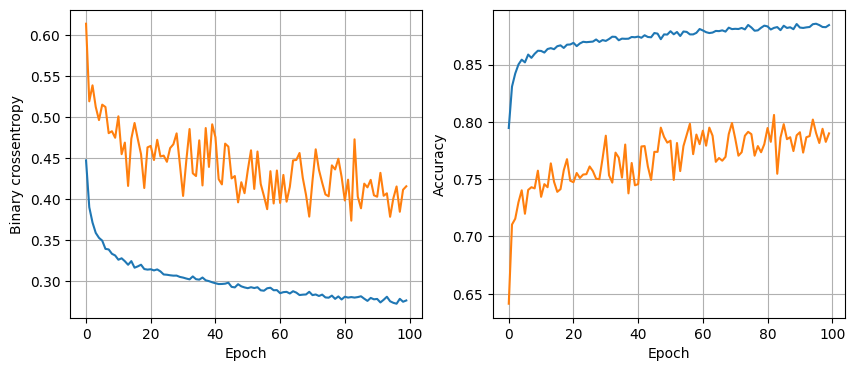

119/119 [==============================] - 0s 3ms/step - loss: 0.3096 - accuracy: 0.8722
64 nodes, dropout 0.2, lr 0.001, batch size 64


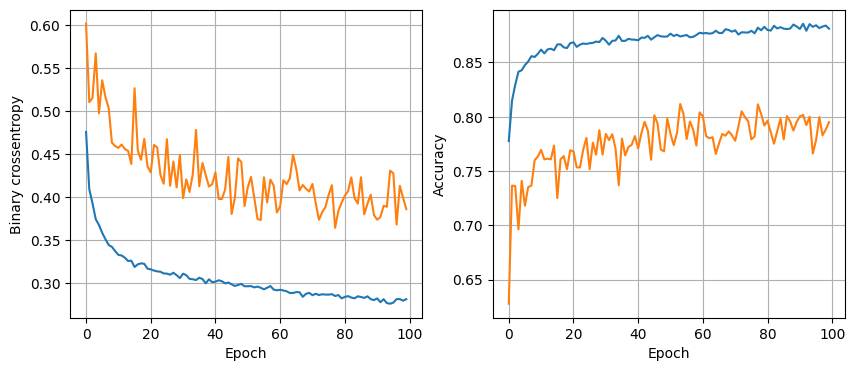

119/119 [==============================] - 0s 3ms/step - loss: 0.3043 - accuracy: 0.8738
64 nodes, dropout 0.2, lr 0.001, batch size 128


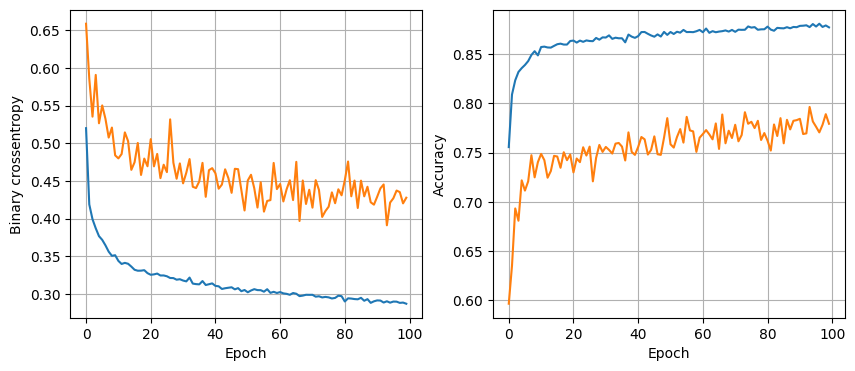

119/119 [==============================] - 0s 3ms/step - loss: 0.3049 - accuracy: 0.8696


In [ ]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in[0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_val, y_val)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [ ]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype.reshape(-1,)

In [ ]:
print(classification_report(y_test, y_pred))

This is the end of the project where we dove into classification models.